<a href="https://colab.research.google.com/github/vikpy/algorithm-practice/blob/master/SOMipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=5cae44c25be1eb5434b681a9318ad8825f629f7a2263eb09982d4d9f99f9dc83
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


## Importing the libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [10]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


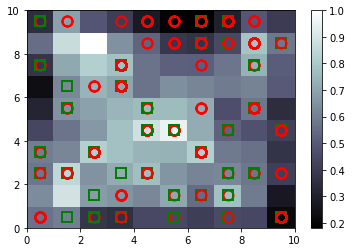

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [12]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [13]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15605791
15667451
15571415
15565714
15565996
15644400
15581871
15617065
15624850
15632275
15615176
15588019
15575146
15790254
15768600
15748552
15757467
15801441
15815443
15748432
15708714
15788131
15771856
15720644
15696287
15808023
15795079
15808386
15698749
15764841
15748649
15729718
15786539
15773776
15778345
15791769
15776494


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [14]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [15]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [17]:
import tensorflow as tf
tf.__version__

'2.3.0'

## Initializing the ANN

In [18]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [22]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 756us/step - loss: 0.6173 - accuracy: 0.7841
Epoch 2/10
690/690 [==============================] - 0s 707us/step - loss: 0.3338 - accuracy: 0.9290
Epoch 3/10
690/690 [==============================] - 1s 743us/step - loss: 0.2623 - accuracy: 0.9391
Epoch 4/10
690/690 [==============================] - 0s 711us/step - loss: 0.2299 - accuracy: 0.9420
Epoch 5/10
690/690 [==============================] - 1s 726us/step - loss: 0.2119 - accuracy: 0.9435
Epoch 6/10
690/690 [==============================] - 0s 702us/step - loss: 0.1993 - accuracy: 0.9449
Epoch 7/10
690/690 [==============================] - 0s 721us/step - loss: 0.1903 - accuracy: 0.9449
Epoch 8/10
690/690 [==============================] - 1s 726us/step - loss: 0.1842 - accuracy: 0.9464
Epoch 9/10
690/690 [==============================] - 1s 728us/step - loss: 0.1803 - accuracy: 0.9464
Epoch 10/10
690/690 [==============================] - 0s 705us/step - loss: 0.176

## Predicting test set results

In [23]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [27]:
pd.DataFrame(y_pred, columns = ["Customer ID", "Probabilities"]
)

,Customer ID,Probabilities
0,15788215.0,0.000264
1,15659100.0,0.000274
2,15809909.0,0.000299
3,15591107.0,0.000369
4,15790630.0,0.000438
...,...,...
685,15719940.0,0.255371
686,15735837.0,0.273283
687,15598802.0,0.273919
688,15673907.0,0.301072
